<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [34]:
import piplite
await piplite.install(['seaborn', 'pandas'])
import pandas as pd
import seaborn as sns 


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<function matplotlib.pyplot.show(close=None, block=None)>

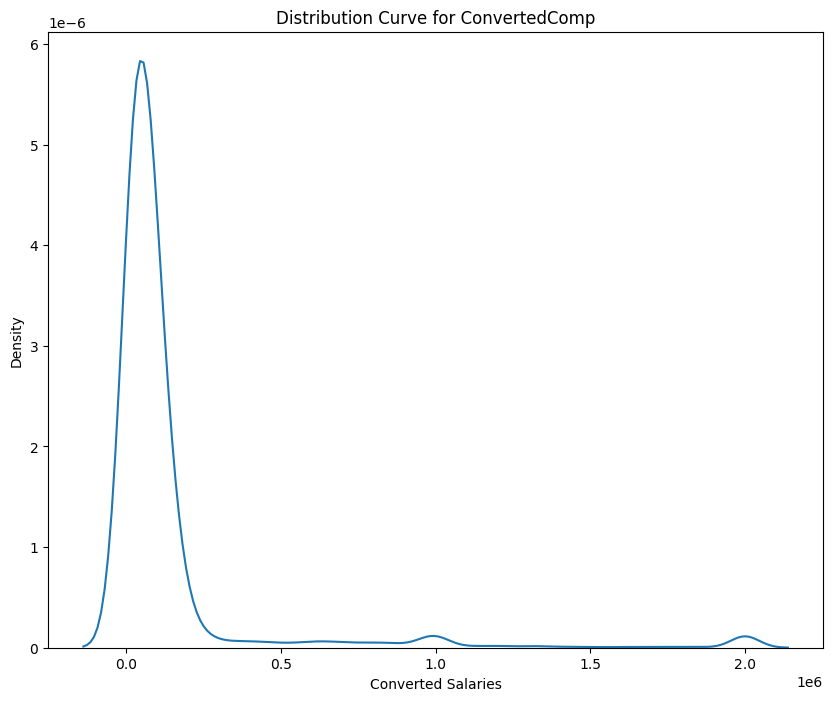

In [55]:
# your code goes here
import matplotlib.pyplot as plt 


df_conv = df['ConvertedComp'].dropna()
plt.figure(figsize = (10,8))
sns.kdeplot(df_conv)
plt.xlabel("Converted Salaries")
plt.title("Distribution Curve for ConvertedComp")
plt.show


Plot the histogram for the column `ConvertedComp`.


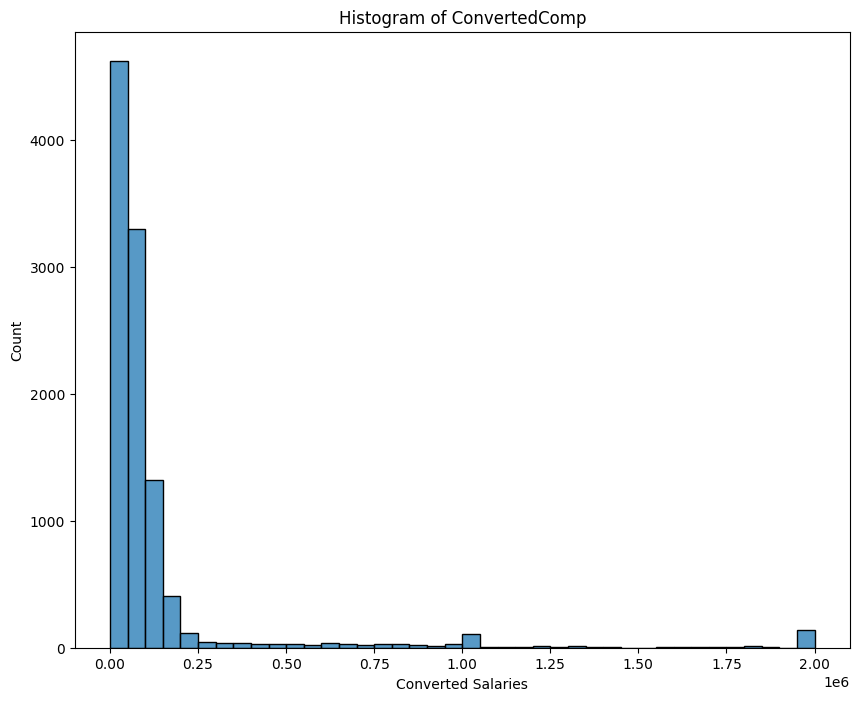

In [47]:
# your code goes here
plt.figure(figsize = (10,8))
plt.title("Histogram of ConvertedComp")
plt.xlabel("Converted Salaries")
sns.histplot(df_conv, bins = 40 )
plt.show()

What is the median of the column `ConvertedComp`?


In [57]:
# your code goes here
print(f"The median value of the ConvertedComp column is: {df_conv.median()}")

The median value of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [62]:
# your code goes here
man_count = df[df["Gender"] == "Man"]
print(f"The number of responders identified as Man is: {len(man_count)}")

The number of responders identified as Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [68]:
# your code goes here
grouped = df.groupby("Gender")["ConvertedComp"].median()

grouped[grouped.index=="Woman"]

Gender
Woman    57708.0
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [71]:
# your code goes here
min_age = df["Age"].min()
q1_age = df["Age"].quantile(0.25)
median_age = df["Age"].median()
q3_age = df["Age"].quantile(0.75)
max_age = df["Age"].max()

print(f"Min: {min_age}")
print(f"Q1 (25th percentile): {q1_age}")
print(f"Median: {median_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"Max: {max_age}")

Min: 16.0
Q1 (25th percentile): 25.0
Median: 29.0
Q3 (75th percentile): 35.0
Max: 99.0


Plot a histogram of the column `Age`.


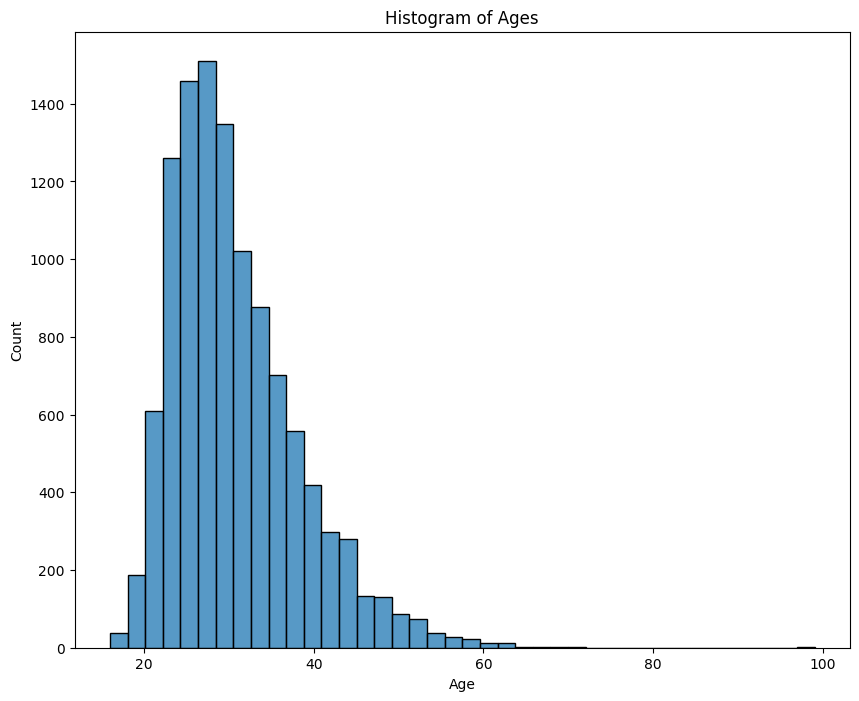

In [77]:
# your code goes here
plt.figure(figsize=(10,8))
sns.histplot(df["Age"], bins = 40)
plt.title("Histogram of Ages")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


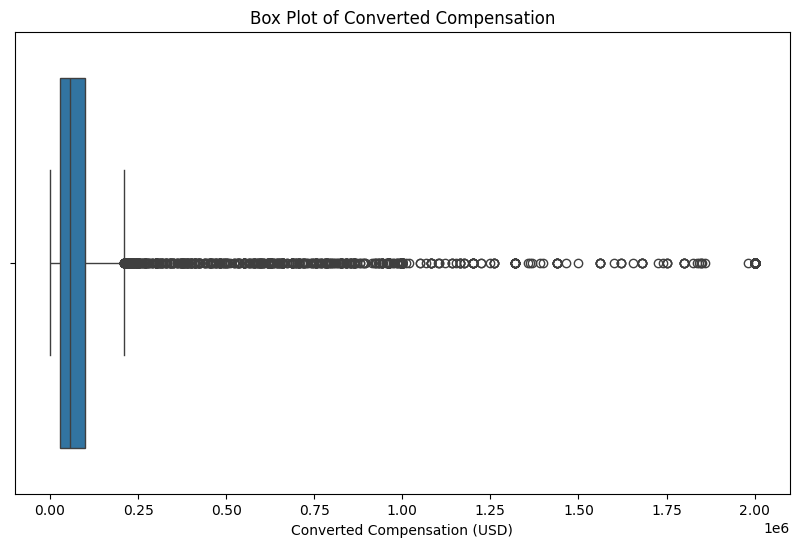

In [79]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["ConvertedComp"])
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [82]:
# your code goes here
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR}")

The Interquartile Range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [84]:
# your code goes here

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Lower bound for outliers: -82830.0
Upper bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [103]:
# your code goes here
outliers = df["ConvertedComp"][df["ConvertedComp"] > upper_bound ]
print(f"The number of outliers in the ConvertedComp columns is: {outliers.count()}")

The number of outliers in the ConvertedComp columns is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [107]:
# your code goes here
new_df = df.drop(df[df['ConvertedComp'] > upper_bound].index)
new_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat l

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [114]:
# your code goes here
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()["Age"]

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
